In [1]:
import tensorflow as tf

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
sess = tf.InteractiveSession()

In [3]:
#First, we set up the input image. 
#We use a tf.Variable instead of a tf.placeholder because we will need it to be trainable. 
#We can still feed it when we want to.

image = tf.Variable(tf.zeros((299, 299, 3)))

In [4]:
image_path = "test_data/redTest.jpg"

# Read in the image_data
image_data = tf.gfile.FastGFile(image_path, 'rb').read()

# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line in tf.gfile.GFile("retrained_labels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("retrained_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')
    

# Feed the image_data as input to the graph and get first prediction:
softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})


In [5]:
def classify(img, correct_class=None, target_class=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    fig.sca(ax1)
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    p = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})[0]

    ax1.imshow(img)
    fig.sca(ax1)
    
    topk = list(p.argsort()[-5:][::-1])
    print(topk)
    topprobs = p[topk]
        
    barlist = ax2.bar(range(5), topprobs)
    if target_class in topk:
        barlist[topk.index(target_class)].set_color('r')
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')
    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(5),
               [label_lines[i][:15] for i in topk],
               rotation='vertical')
    fig.subplots_adjust(bottom=0.2)
    plt.show()

In [6]:
import PIL
import numpy as np
import json
import matplotlib.pyplot as plt

In [7]:
img_path = "test_data/redTest.jpg"
image_data = tf.gfile.FastGFile(image_path, 'rb').read()
img_class = 2
img = PIL.Image.open(img_path)
big_dim = max(img.width, img.height)
wide = img.width > img.height
new_w = 299 if not wide else int(img.width * 299 / img.height)
new_h = 299 if wide else int(img.height * 299 / img.width)
img = img.resize((new_w, new_h)).crop((0, 0, 299, 299))
img = (np.asarray(img) / 255.0).astype(np.float32)

[2, 0, 4, 3, 1]


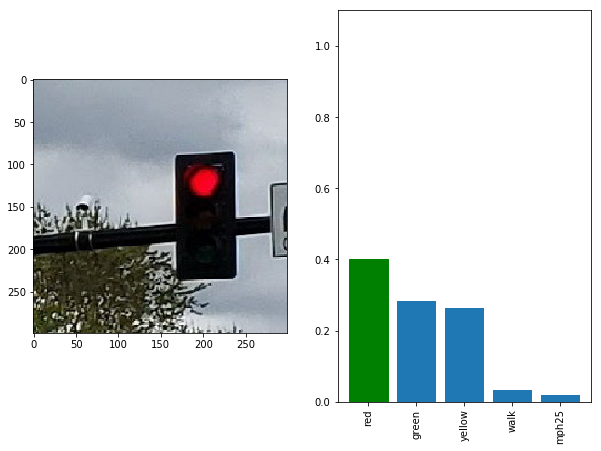

In [8]:
classify(img, correct_class=img_class)